# 1. Literal Match

'cat' will match 'cat'

22 will match 22, but it will only match first 22 of 222.

Or both first 22 and last 22 of 2222. But not match the two 2's in the middle. As first 22 matches, it is considered consumed. So middle 2's will never match. Then it matches next 22. That is why in case of 222, it does not match last 2.

# 2. Character class 1

Try to match individual characters in the `[ ]`. 

Or we can do range of characters like `[A-Za-z0-9]`

**Negating the match:** Suppose I want to match anything other than capital letters then use `[^A-Z]`, first input after `^` in `[]` will be negated

However, `^[A-Z]`: In this case `^` is outside and that means the matching word has to start with a capital letter.

If we want to match a `-`, we can do it in 2 ways
* put `\-` in the `[]` as it will take away it's special meaning of being a range. i.e. `[\-A-Z]`
* or put it after `A-Z` in the `[]`. i.e. `[A-Z-]`

# 3. Character class 2

If we have to match any other symbols or probably any letters (capital, small), numbers or symbols we can use a trick by using `[\ -~]`. This means anything from space to tilda according to ASCII table and that means it will match literally anything.

# 4. Alterations

`|` or pipe. `cat|dog` means it will match any word that is cat OR dog. We can keep chaining alterations. eg `cat|dog|fish|mice`

# 5. Metacharacters

**Interesting as some metacharacters require backslash`\` for _special meaning_. While some require `\` for _literal meaning_.**

* ` . `: matches everything (numbers, letters, symbols) including literal dot. Except for new line
* ` \. `: matches literal period


* `[a-zA-Z0-9_]`: is same as `\w`
* `[^a-zA-Z0-9_]`: is same as `\W`


* `[0-9]`: is same as `\d` means all digits
* `[^0-9]`: is same as `\D` means everything except digits


* any space like tab(`\t`) or new line(`\n`) will be matched by `\s`
* any non-space will be matched by `\S`


* Suppose we want to match literal `[]`, then would be the pattern. To make anything LITERAL just put `\` infront of it. So to match `[]`, it would be `\[\]`


* Except `\w\W\d\D\s\S`, using `\` is for making anything **literal** like `\.`

# 6. Quantifiers

2 quantifiers-
1. `*`: means 0 or more times
2. `+`: means 1 or more time

### We should use quantifiers to match _words instead of characters_

093 will be matched by `[0-9]+` or `\d+`. Similarly _Dragon_ will be matched by `[A-Za-z]+` or `\w+`




### Greedy vs Non-greedy
Quantifiers are greedy by default. That means it consume as much as possible. Here it is matching all 3 paragraphs whereas we want to match 1 at a time.

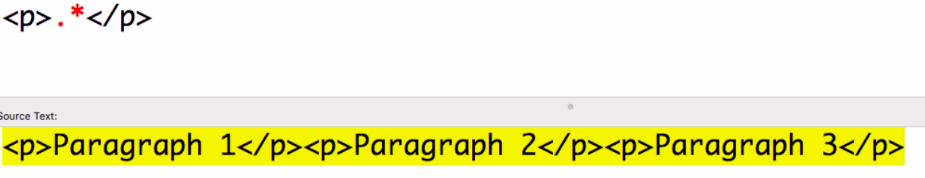

### To prevent this we have to make it **Non-greedy** by adding ` ? ` at the end
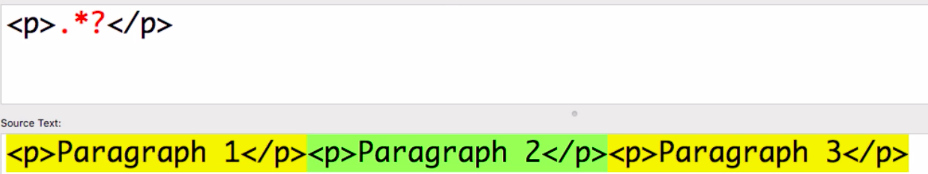

### Greedy vs Non-greedy
Quantifiers are greedy by default. That means it consume as much as possible. Here it is matching all 3 paragraphs whereas we want to match 1 at a time.

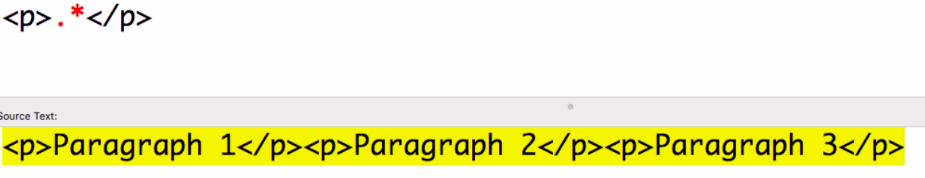

### To prevent this we have to make it **Non-greedy** by adding ` ? ` at the end
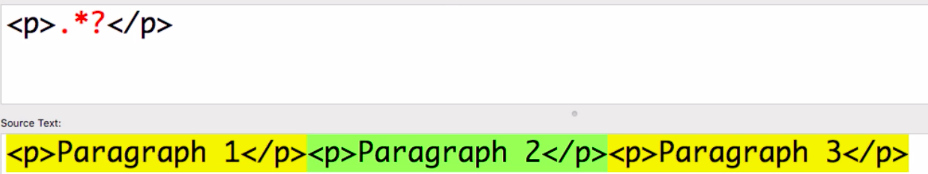

## Also we can make things optional by adding `?`. Here `?` will ensure optional presence of the preceding character

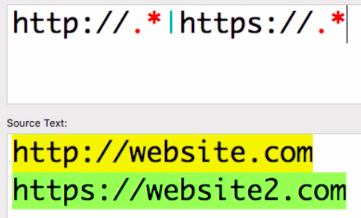

### we can match both website by being direct. But we can also add `?` after `s` of `https` to make `s` optional so that with 1 pattern we can match both
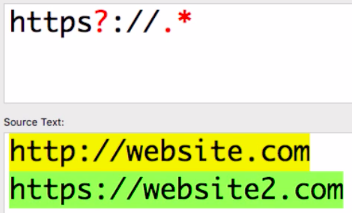

# 7. Iterations

Iterations match a pattern certain number of times. It can work for both numbers and letters.

* `4{m}`: This will match number 4 when it is present with m multiple eg `4{2}` will match 44.


* `4{m,n}`: This will match number 4 when it is present between the range of m and n multiple eg `4{2,4}` will match 4444, or 444 or 44. Given all 3 options are there it will match 4444 as it is greedy. To prevent greediness we can use `?` and thus pattern will become `4{m,n}?`


* `4{m,}`: This will match number 4 with multiple of m and beyond eg `4{2,}` will match 44, 4444, 4444444 etc.


* This can be used for letters too eg `\w{3,5}`: This will match any words where length of letters are between 3 and 5

# 8. Capture and Non-Capture groups

**Capture group** will match whatever we put in the parenthesis `( )` and save it in the memory. We can just pull out whatever is in the capture group later. example

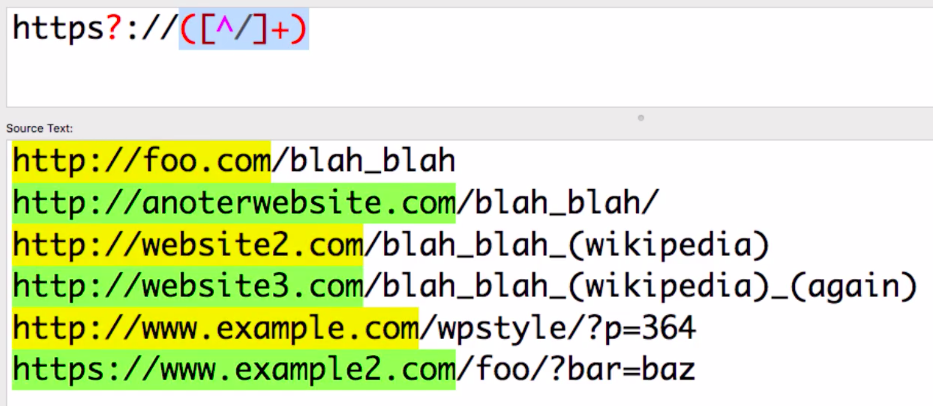

* Here we want to match `foo.com`, `anoterwebsite.com` etc. We see both `http://` and `https://` are present. To make `s` of `https://` optional, we can add `?`

* Now to match the next part (part of interest), I negate `/` and thus `[^/]+` will select upto the end of my interest. But just to select `foo.com`, `anoterwebsite.com` etc, I can put `[^/]+` within `( )` and thus, only that part can be selected out as a capture group.

* **Non-capture group** will prevent capturing to memory. This is to get the entire part rather than the part that is within `( )`. In this case we have to add `?:` at the beginning of the `( )`

# 9. Lookarounds

2 types **Lookahead** and **Lookbehind**

## Lookahead:
2 types as well **+ve lookahead** and **-ve lookahead**

### Positive lookahead

Suppose we want to match the word `cool` but only if it is followed by a space and then `cat`
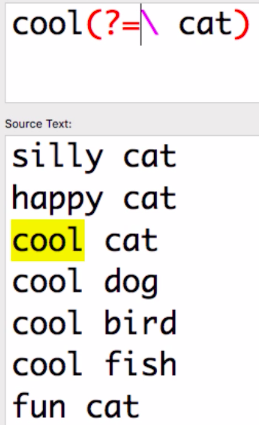

Just using cool will match all 4 `cool`. To make it specific to the `cat` we have to use `+ve lookahead` as we will be looking ahead of the determinant here i.e. `cat`.

* `?=` : This means `positive lookahead`. After that `\<space> ` means literal space. Then it matches `cat`.

### This means the pattern `(?=\ cat)` look for does the `(space)cat` exist? If it does due to `?=` or positive lookahead select whats preceeding it.

### Negative lookahead

Suppose we want to match the word `cool` but only if it is NOT followed by a space and then `cat`

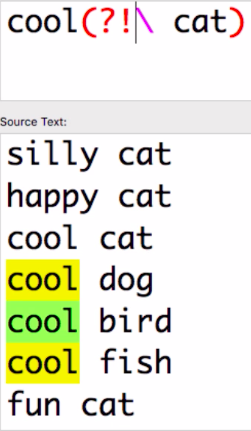

* `?!` : This means `NEGATIVE lookahead`. After that `\<space> ` means literal space. Then it matches `cat`.

### This means the pattern `(?!\ cat)` look for does the `(space)cat` exist? If it does due to `?!` or NEGATIVE lookahead DO NOT select whats preceeding it. Select the rest

## Lookbehind:
2 types as well **+ve lookbehind** and **-ve lookbehind**

### Positive lookbehind

Suppose we want to match the word `cat` but only if it is followed by `cool` and then a space
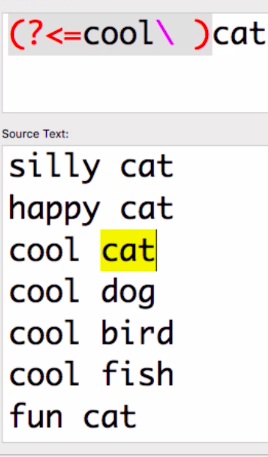

Just using `cat` will match all 4 `cat`. To make it specific to the `cool` we have to use `+ve lookbehind` as we will be looking behind of the determinant here i.e. `cool`.

* `?<=` : This means `positive lookbehind`. After that `cool` and then `\<space> ` means literal space. Then it matches required `cat`.

### This means the pattern `(?<=cool\ )` look for does the `cool(space)` exist? If it does due to `?<=` or positive lookbehind select whats after it.

### Negative lookbehind

Suppose we want to match the word `cat` but only if it is NOT preceeded `cool` and then a space.
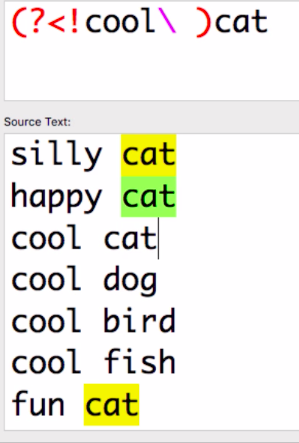

* `?<!` : This means `NEGATIVE lookbehind`. After that `cool` and then `\<space> ` means literal space. Then it matches required `cat`.

### This means the pattern `(?<!cool\ )` look for does the `cool(space)` exist? If it does due to `?<!` or NEGATIVE lookbehind DO NOT select whats after it. Select the rest.

# 10. Word boundaries 

Suppose one is trying to match `woo` only in case of `woo` exists independently. If we just look for `woo` match, then both `woo` and `woohoo` will be selected. In order to only select `woo` out of `woo` and `woohoo`, we can use `\b` or boundary. So the pattern will be `woo\b`

# 11. Anchors
Matches start and end of the string.
* `^`: matches start of the string.
* `$`: matches end of the string

# 12. Modifiers
modifies how anchors work.

1. **`m modifier`:** 
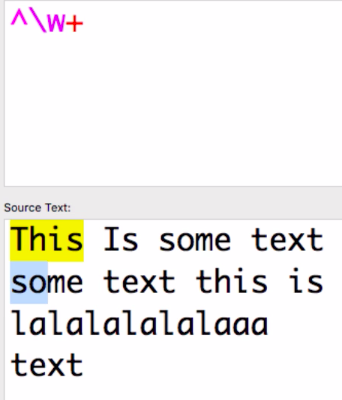    

`^\w+`: This will match the first word of the text. `+` ensure matching of the entire word. And `^` ensures matching of the first word of the text.

### What if I want to match the first word of every line? Then we need to modify the anchor `^`. 


### That would be `m-modifier`
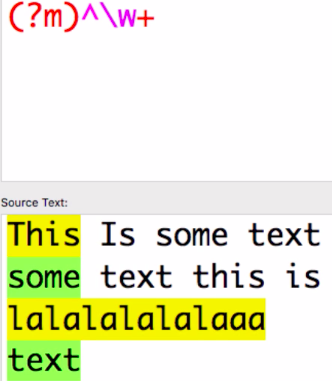

We can use the `m-modifer` in the same way to match every end word of all the lines of the text. 

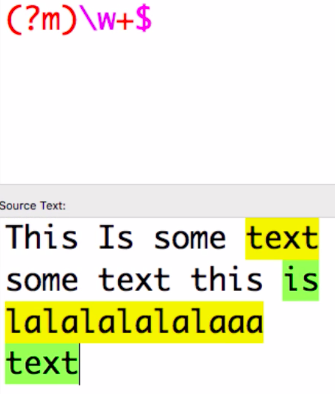

2. **`Case insensitive modifer:`**
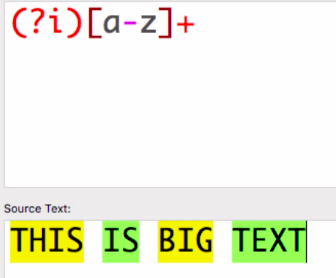

Although we are using `[a-z]+`, which is suppose to match only lowercase. Due to case insensitive modifer i.e. `(?i)` it is also matching capital letter words

3. **`New line modifier`**:
`.` matches anything. `.+` matches any number of words. But this does NOT match a new line.
Using `(?s).+` will ensure matching new lines too. 

4. **`x-modifier`**: allows to write comments
    
### All these modifiers can be written together as well eg `(?misx)`

# Section 3: Case Studies

## 1. Matching phone numbers

In [1]:
text = ' phone number includes\
123-456-7980\
123 555 5555\
(123) 555 5555\
123.564.5923\
+91 (123) 456  4539'

`r'^(?:\+\d{1,2}\ )?'`: This will match `+91`

**explanation**: `^(?:\+`: To make it non-capture group we add `?:`. Then to match `+` of `+91` we provide literal `+` by `\+` as `+` has special meaning.

`\d{1,2}\ )?` :  Generally after `+` there are 1 or 2 digits. That is matched by ` \d{1,2}`. This is generally followed by a space and `\<space>` matches a space. 

To make the whole thing optional we add `?` at the end. As only 1 of the phone number contains `+91`

----------------------------------------------------------------------------------------------------------------------

`r'\(?\d{3}\)?`: This will match first 3 digits with or without `( )`

**explanation**: We see in few cases there is `(123)` and in rest `123` (digits can vary) so `()` optional here.

To match parenthesis and first 3 digits of the phone number-

`\(?`: as `(` has special meaning, it has to be preeceded by a escape character and thus `\(` and as this is optional we write `\(?`.
Then it is followed by 3 digits and thus `\d{3}`. That is followed by `\)?`. `?` to make parenthesis optional as it is not present in every case. 

----------------------------------------------------------------------------------------------------------------------

To match `<space>` or `-` or `.` we will use `[\ \.-]`

`\<space>` will match the space after first 3 digits, then `\.` will match a literal dot and `-` will match a `-`

----------------------------------------------------------------------------------------------------------------------

After that again there are 3 digits, so regex for that would be `\d{3}`

----------------------------------------------------------------------------------------------------------------------

Then again `<space>` or `-` or `.` is present. So repeat penultimate code

To match `<space>` or `-` or `.` we will use `[\ \.-]`

`\<space>` will match the space after first 3 digits, then `\.` will match a literal dot and `-` will match a `-`

----------------------------------------------------------------------------------------------------------------------

Followed by 4 digits. Therefore `\d{4}`

In [2]:
import re

text = '123-456-7980'
text1 = '123 555 5555'
text2 = '(123) 555 5555'
text3 = '123.564.5923'
text4 = '+91 (123) 456 4539'

pattern = r'^(?:\+\d{1,2}\ )?\(?\d{3}\)?[\ \.-]\d{3}[\ \.-]\d{4}'

regex = re.compile(pattern)
print(regex.findall(text))
print(regex.findall(text1))
print(regex.findall(text2))
print(regex.findall(text3))
print(regex.findall(text4))

['123-456-7980']
['123 555 5555']
['(123) 555 5555']
['123.564.5923']
['+91 (123) 456 4539']


## 2. Reading only elements in a CSV file

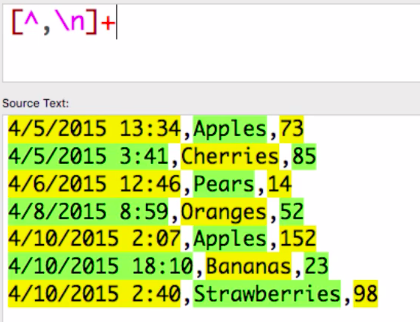

Here we want to select only numbers and words and want to omit `,` and new lines `\n`.

`[^, \n]+`: Here `[^,]` causes selection of everything except `,`

Presence of `^` and `\n` allows selection of everything except newline.

After that a `+` ensures 1 or more time of these selections.

## 3. Selection of 1st column and last column

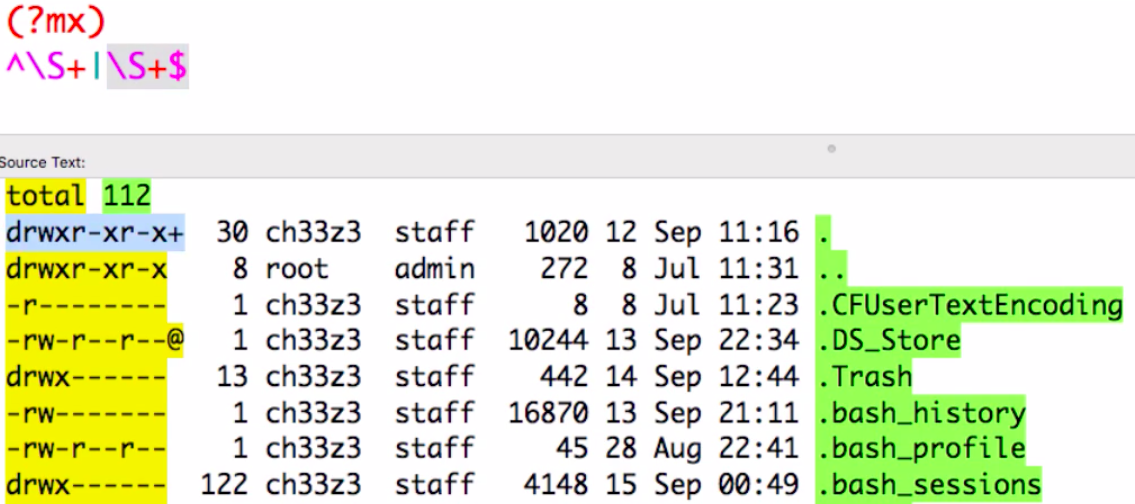

`^\S+|\S+$` matches the first and last column.

**explanation** `^\S+` matches the first non-space character 1 or more time. As the first column do NOT start with a space it gets selected upto the point of presence of space. This selection is highlighted in yellow.

Then we want to also select the last column. `\S+$` ensures last column selection. Due to `$` it matches from the end. And the non-space character present from the end is the last column and thus it is selected and highlighted in green. 

Same principle was also applied for the selection of `total<space>112`

## 4. Tricky selection

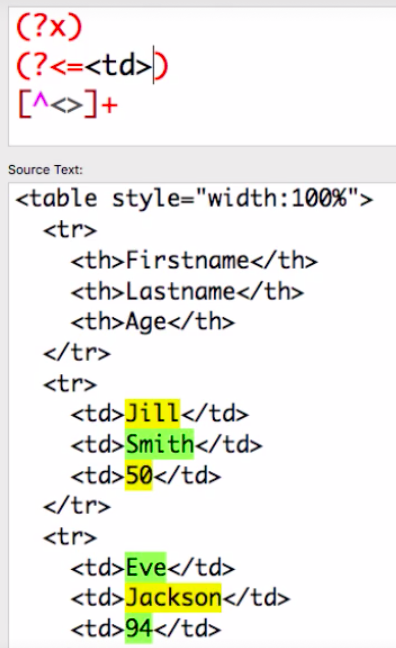

We want to select the highlighted region after `<td>` but we do NOT want `<>`. So `[^<>]+` prevents selection of `<>`

Now we just want whatever follows `<td>`. `[^<>]+` will prevent selection of `<>`. Now to select whatever follows `<td>` we need to use positive lookbehind which is denoted by `?<=`. Thus to select whatever follows `<td>`, we will use `(?<=<td>)`